In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots

from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore') 

### Read the data

In [2]:
df = pd.read_excel('Oil_Prices.xls')
df.head()

,Date,Price
0,2023-07-26,78.78
1,2023-07-25,79.63
2,2023-07-24,78.74
3,2023-07-21,77.07
4,2023-07-20,75.63


### Data Exploration

In [3]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

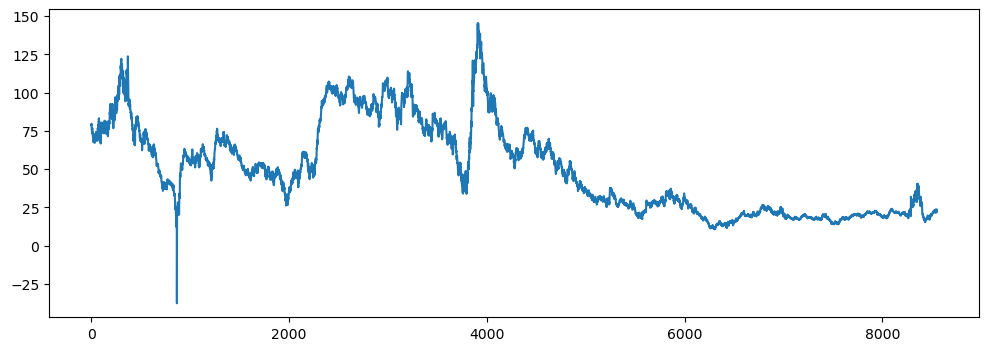

In [4]:
df.Price.plot(figsize=(12,4));

### Descriptive Analysis

In [5]:
print('Shape of the data', df.shape)

Shape of the data (8553, 2)


In [6]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [7]:
df.nunique()

Date     8553
Price    5282
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8553 non-null   datetime64[ns]
 1   Price   8553 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.8 KB


In [9]:
df.describe()

,Price
count,8553.000000
mean,50.253699
std,29.351450
min,-37.630000
25%,22.000000
50%,46.250000
75%,71.980000
max,145.290000


### Feature Engineering

#### Making the Date as DateTime index for the Dataframe

In [10]:
oil_price = df.copy()
oil_price.set_index('Date', inplace=True)
oil_price.index.year

Int64Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
            ...
            1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990],
           dtype='int64', name='Date', length=8553)

In [11]:
oil_price.head()

,Price
Date,
2023-07-26,78.78
2023-07-25,79.63
2023-07-24,78.74
2023-07-21,77.07
2023-07-20,75.63


#### Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [12]:
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"]  = df.Date.dt.strftime("%Y") # year extraction
df

,Date,Price,month,year
0,2023-07-26,78.78,Jul,2023
1,2023-07-25,79.63,Jul,2023
2,2023-07-24,78.74,Jul,2023
3,2023-07-21,77.07,Jul,2023
4,2023-07-20,75.63,Jul,2023
...,...,...,...,...
8548,1990-01-08,21.62,Jan,1990
8549,1990-01-05,23.08,Jan,1990
8550,1990-01-04,23.41,Jan,1990
8551,1990-01-03,23.68,Jan,1990


### Data Visualization

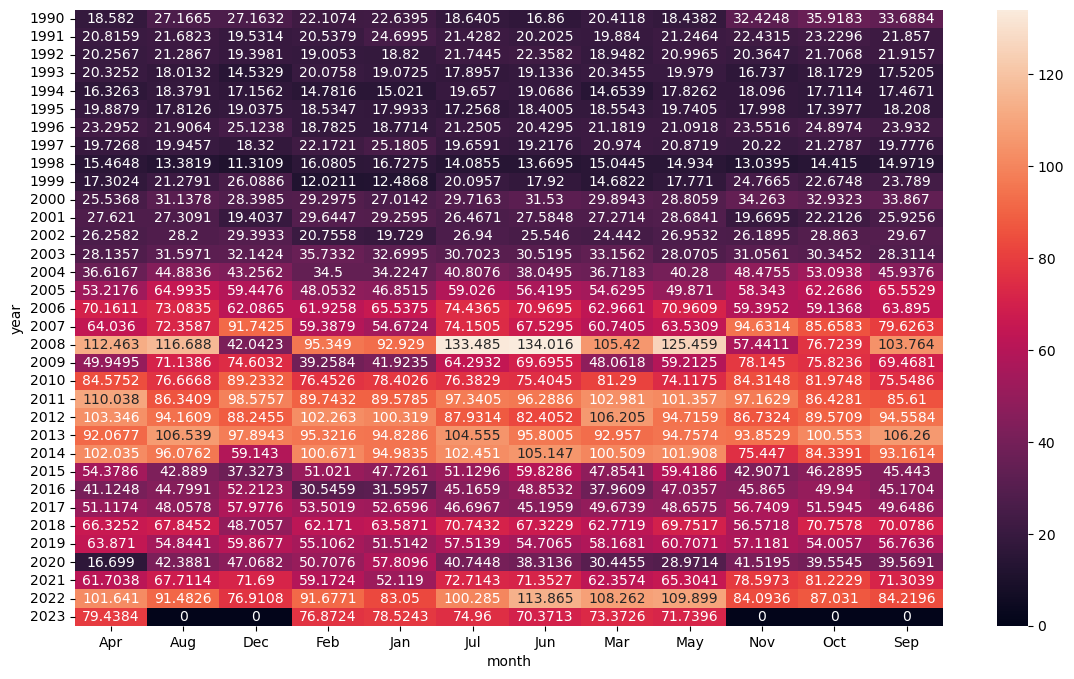

In [13]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

### Line plot

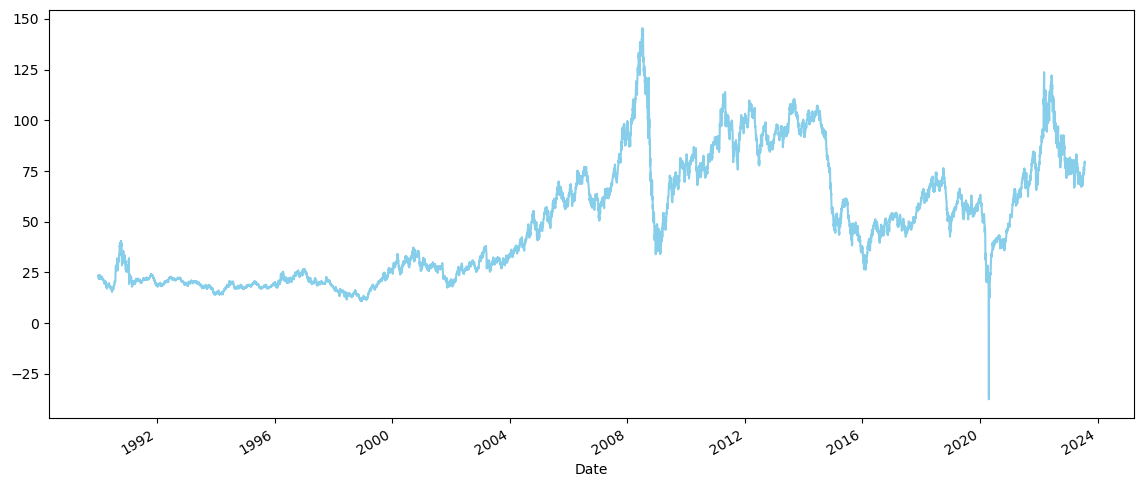

In [14]:
oil_price['Price'].plot(figsize=(14,6),color='skyblue')
plt.show()

# 
Observation :
We can see that there is an increasing and decreasing Trend. So, Trend is not constant.

Variance is also not constant.

Hence the time serise is not stationary.

#### Yearly Price Analysis

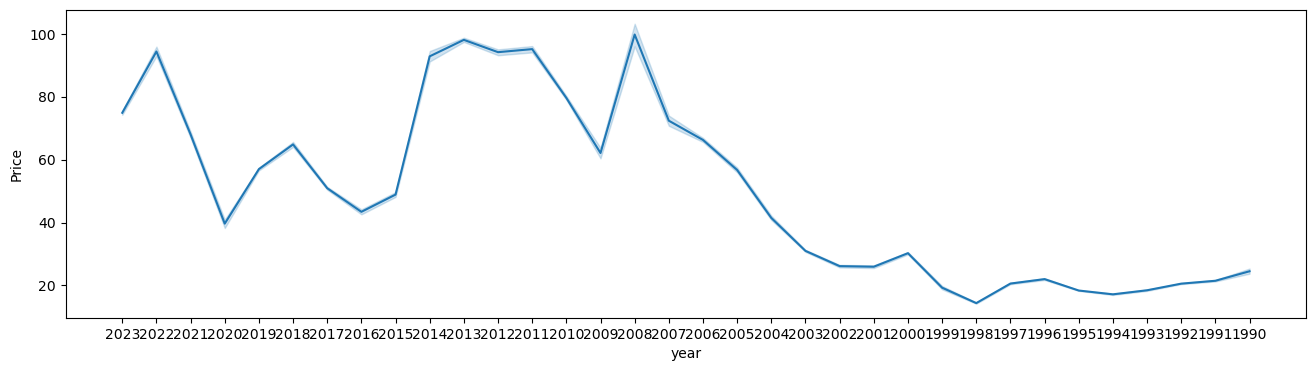

In [15]:
plt.figure(figsize=(16,4))
sns.lineplot(x="year", y="Price", data=df)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

#### Box Plot of Each Year by Monthly Intervals

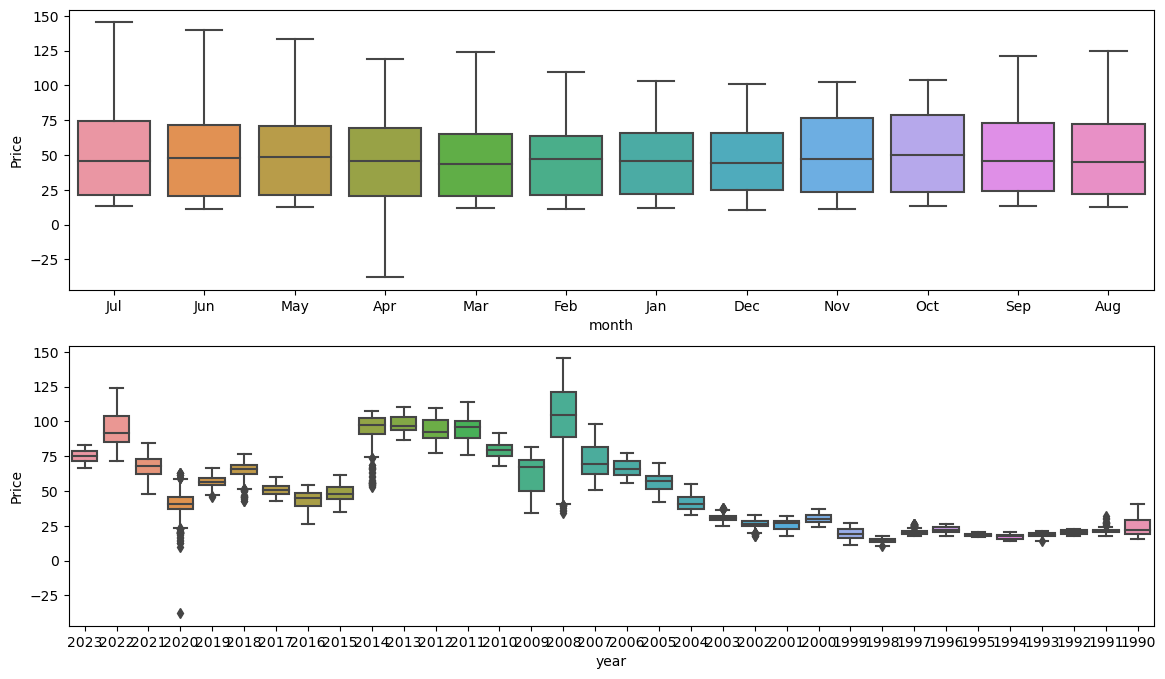

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Price", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="Price", data=df)
plt.show()

#### Histogram and Density Plots

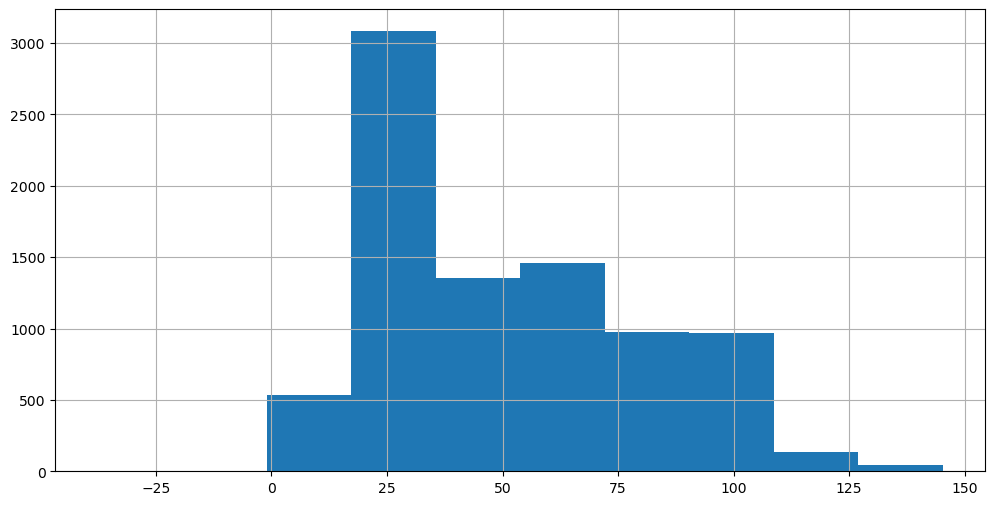

In [17]:
df.Price.hist(figsize=(12,6))
plt.show()

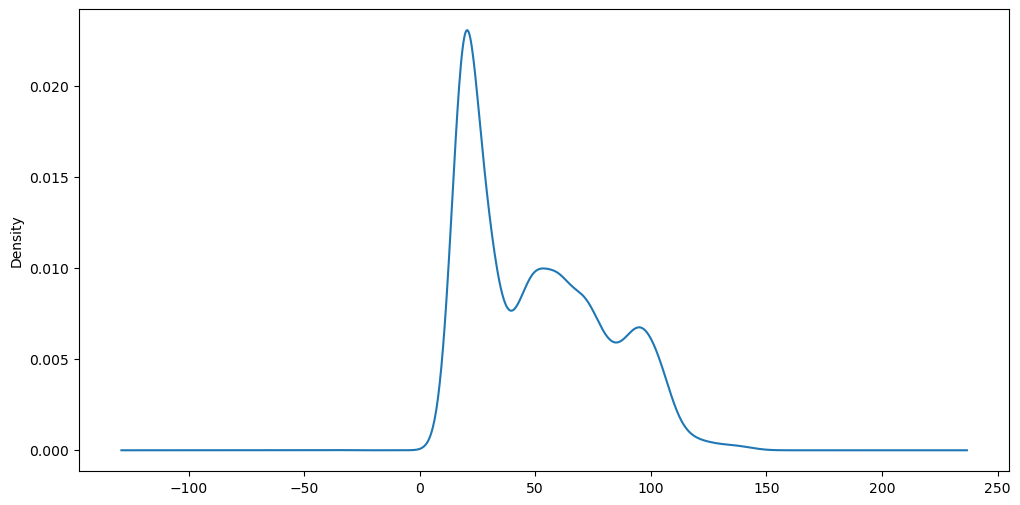

In [18]:
df.Price.plot(kind='kde', figsize=(12,6))
plt.show()

### Lag plot

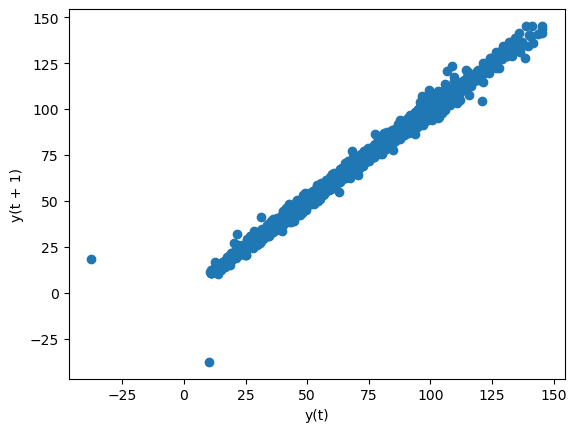

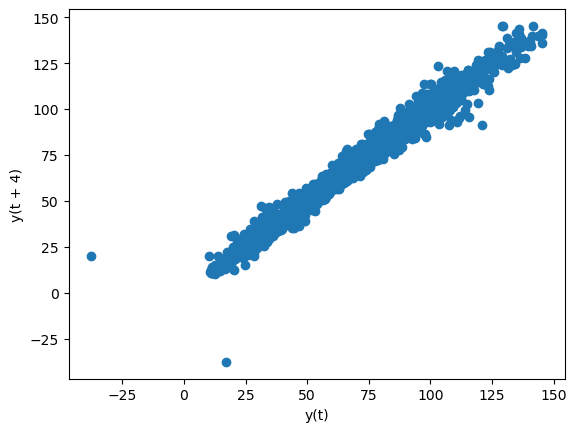

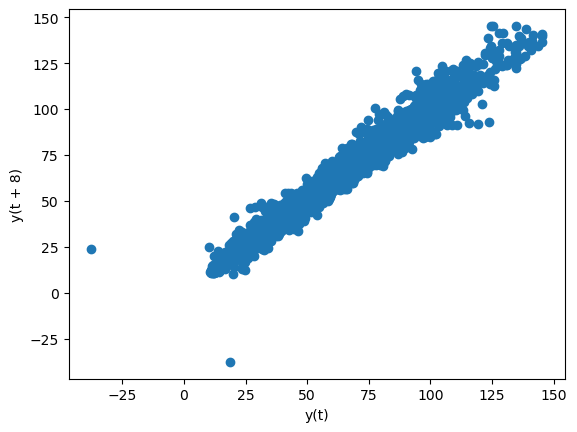

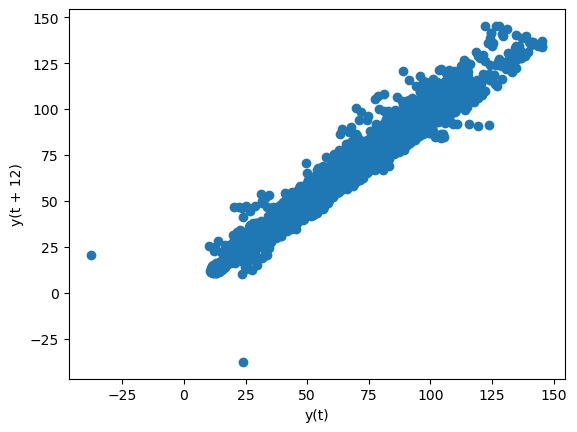

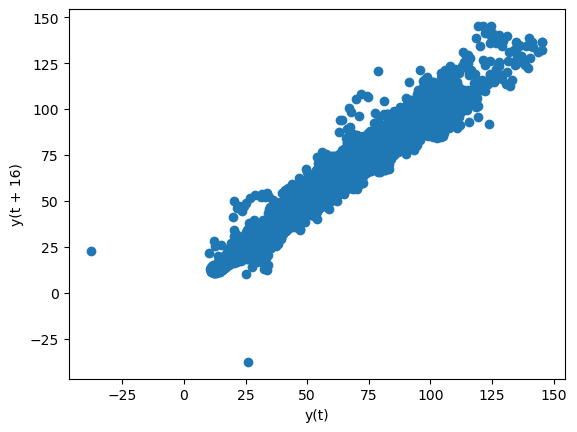

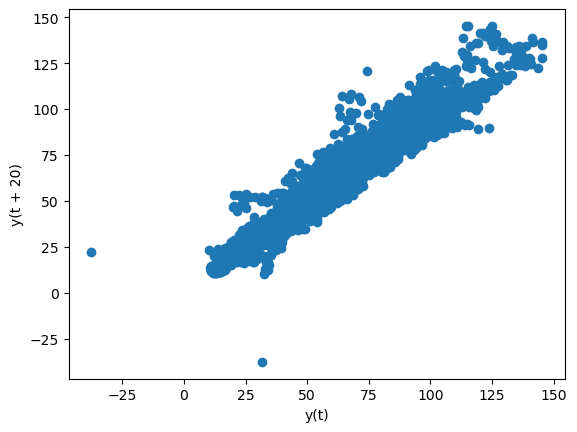

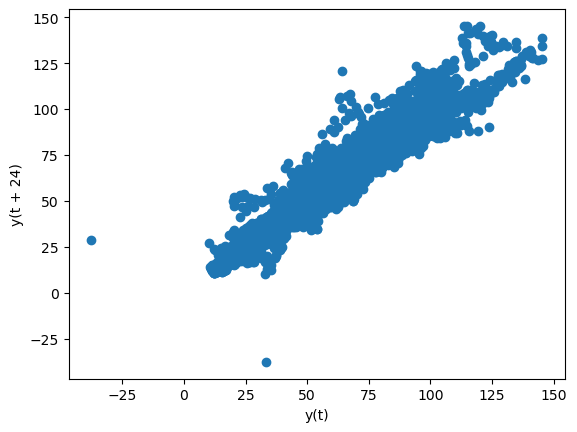

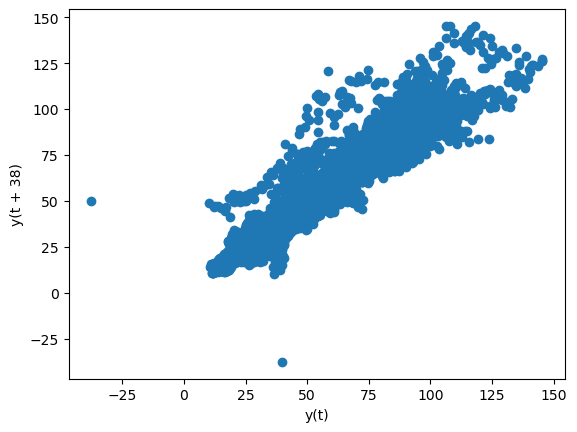

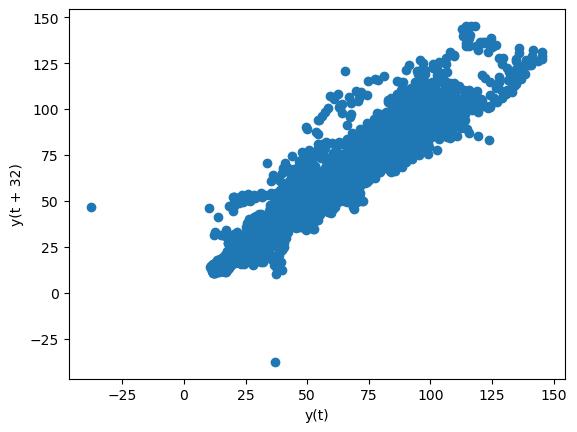

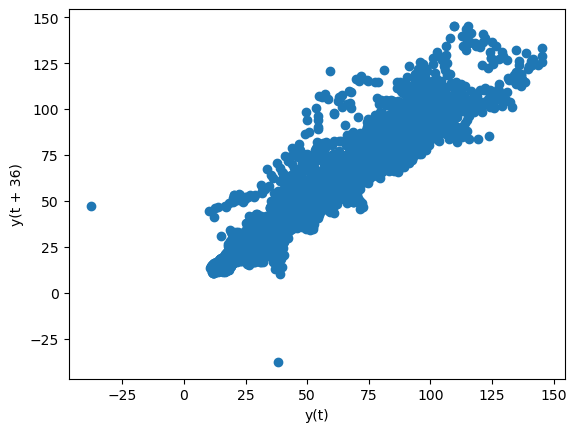

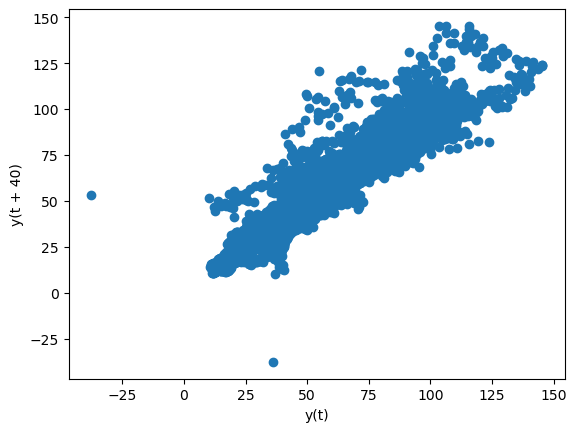

In [19]:
# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(16,8))
    lag_plot(df.Price, lag=i)
    plt.show()

### Time series decomposition plot

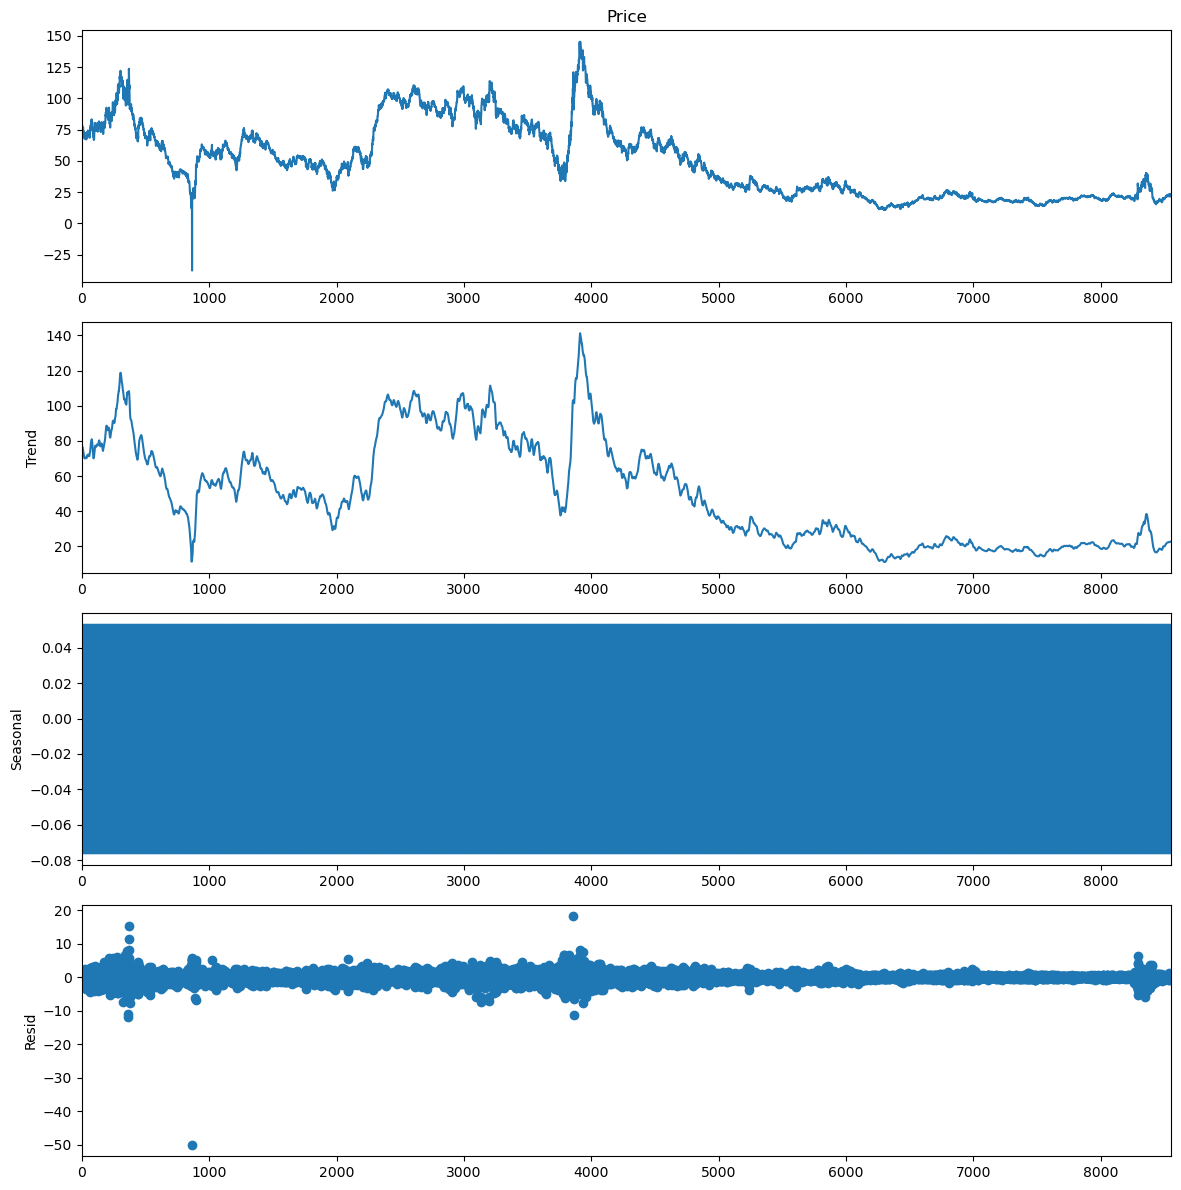

In [20]:
decompose_ts_add = seasonal_decompose(df.Price, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,12))
    decompose_ts_add.plot()
    plt.show()

#### ACF plots and PACF plots

##### Autocorrelation Function (ACF)

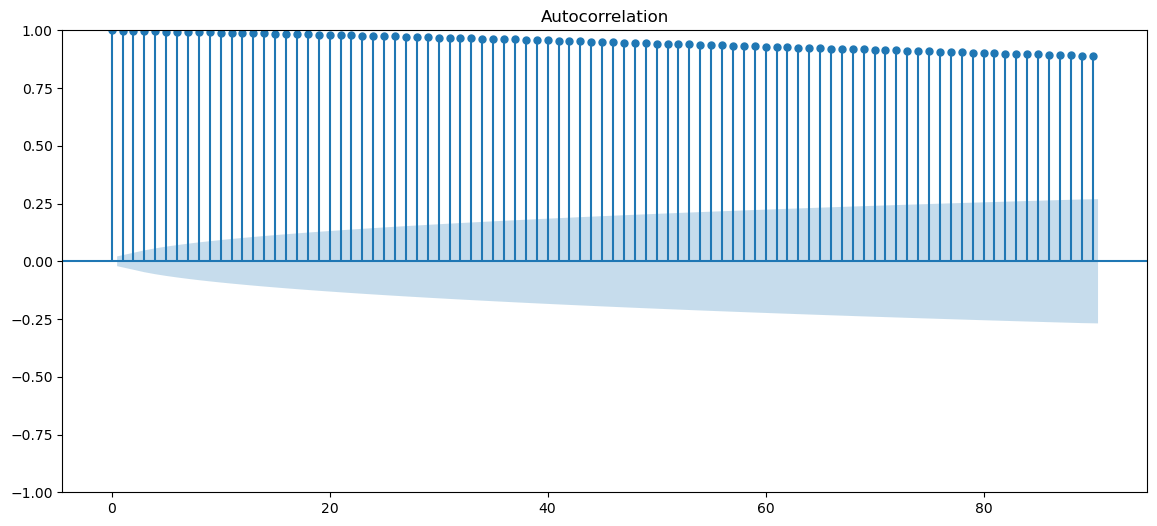

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.Price, lags=90)
    plt.show()

##### Partial Autocorrelation Function (PACF)

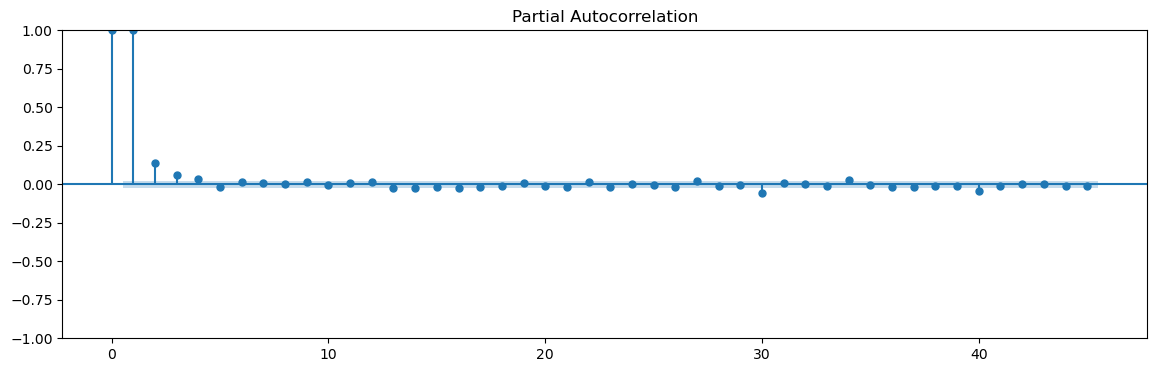

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(df.Price,lags=45)
    plt.show()